<a href="https://colab.research.google.com/github/tbrownx4/job-market-ai-analyzer/blob/main/notebooks/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv("jobs.csv")
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [4]:
df.columns

Index(['position', 'company', 'description', 'reviews', 'location'], dtype='object')

In [5]:
df.shape

(6964, 5)

In [6]:
df.isnull().sum()

,0
position,11
company,11
description,11
reviews,1638
location,11


In [9]:
df[['position', 'company', 'location']].head(10)

,position,company,location
0,Development Director,ALS TDI,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Atlanta, GA"
3,Data Analyst,Operation HOPE,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,"Atlanta, GA"
5,Manager of Data Engineering,McKinsey & Company,"Atlanta, GA 30318"
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,"Atlanta, GA 30318"
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,"Atlanta, GA"
8,Analyst - CIB Credit Research,SunTrust,"Atlanta, GA"
9,Senior Associate - Cognitive Data Scientist Na...,KPMG,"Atlanta, GA 30338"


In [10]:
df[['position', 'company', 'location']].isnull().sum()

,0
position,11
company,11
location,11


In [11]:
df = df.dropna(subset=['position', 'company', 'location'])
df.shape

(6953, 5)

In [12]:
df[['position', 'company', 'location']].head(10)

,position,company,location
0,Development Director,ALS TDI,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Atlanta, GA"
3,Data Analyst,Operation HOPE,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,"Atlanta, GA"
5,Manager of Data Engineering,McKinsey & Company,"Atlanta, GA 30318"
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,"Atlanta, GA 30318"
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,"Atlanta, GA"
8,Analyst - CIB Credit Research,SunTrust,"Atlanta, GA"
9,Senior Associate - Cognitive Data Scientist Na...,KPMG,"Atlanta, GA 30338"


In [13]:
df['company'].value_counts().head(10)

,count
company,
Amazon.com,358
Ball Aerospace,187
Microsoft,137
Google,134
NYU Langone Health,77
Fred Hutchinson Cancer Research Center,70
KPMG,66
Lab126,50
Broad Institute,49


In [14]:
df['location'].value_counts().head(10)

,count
location,
"Seattle, WA",563
"New York, NY",508
"Cambridge, MA",487
"Boston, MA",454
"San Francisco, CA",425
"San Diego, CA",294
"Chicago, IL",292
"Boulder, CO",233
"Washington, DC",230


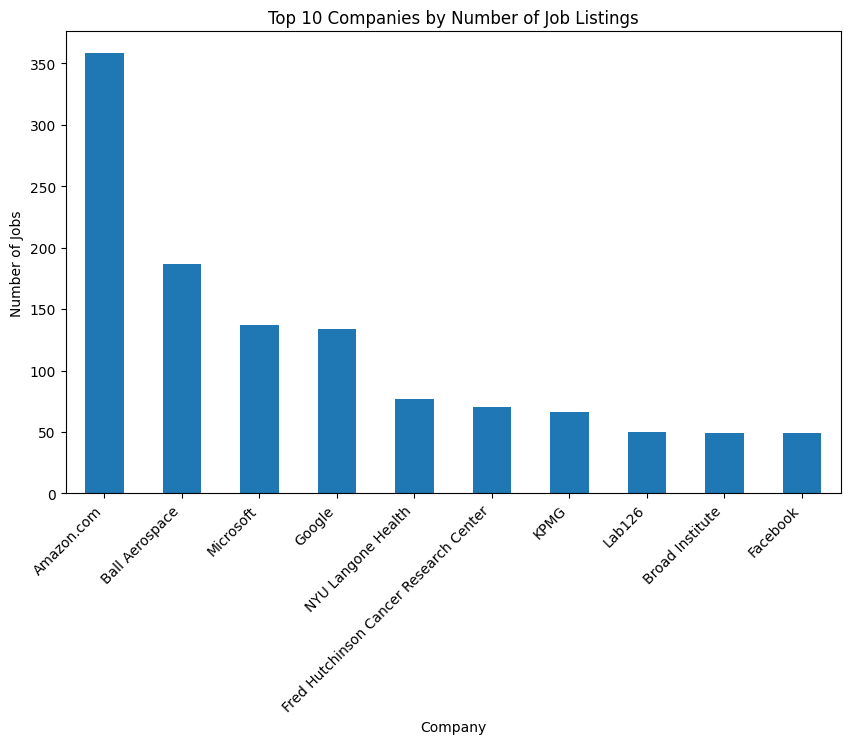

In [20]:
import matplotlib.pyplot as plt
top_companies = df['company'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_companies.plot(kind='bar')
plt.title("Top 10 Companies by Number of Job Listings")
plt.xlabel("Company")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45, ha='right')
plt.show()

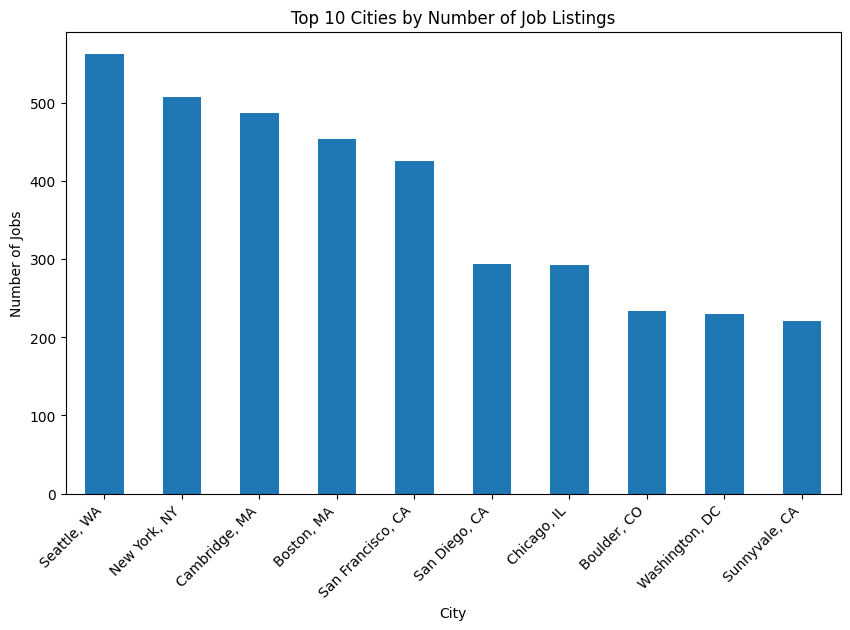

In [21]:
top_cities = df['location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar')
plt.title("Top 10 Cities by Number of Job Listings")
plt.xlabel("City")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45, ha='right')
plt.show()

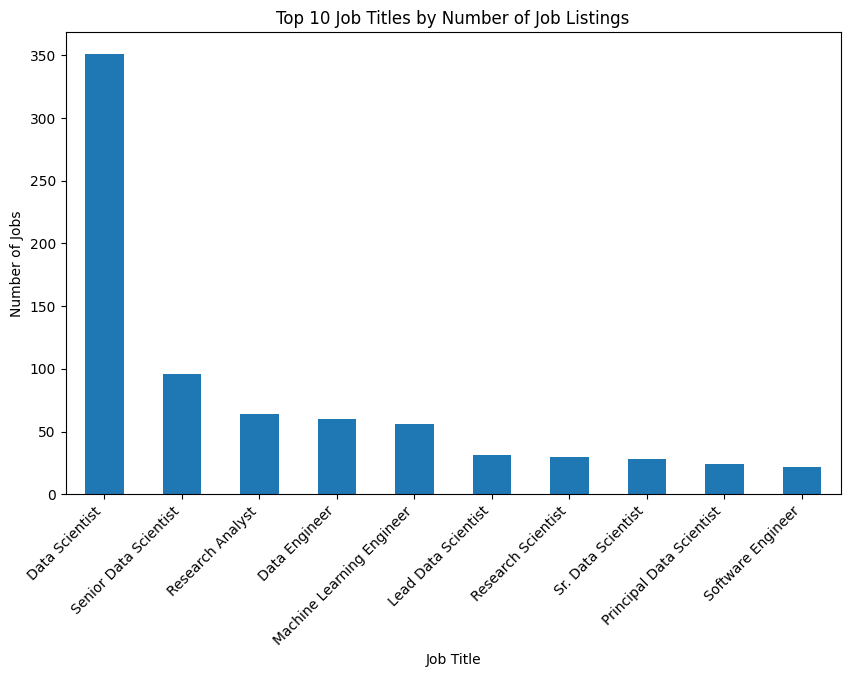

In [24]:
top_positions = df['position'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_positions.plot(kind='bar')
plt.title("Top 10 Job Titles by Number of Job Listings")
plt.xlabel("Job Title")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45, ha='right')
plt.show()

In [25]:
df['position'] = df['position'].str.strip()
df['position'].head(10)

/tmp/ipython-input-1479432308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'] = df['position'].str.strip()


,position
0,Development Director
1,An Ostentatiously-Excitable Principal Research...
2,Data Scientist
3,Data Analyst
4,Assistant Professor -TT - Signal Processing & ...
5,Manager of Data Engineering
6,"Product Specialist - Periscope, New Ventures"
7,"Junior to Mid-level Engineer, Geologist or Env..."
8,Analyst - CIB Credit Research
9,Senior Associate - Cognitive Data Scientist Na...


In [31]:
df['Short_Position'] = df['position'].apply(lambda x: ' '.join(x.split()[:5]))
df['Short_Position'].head(10)

/tmp/ipython-input-688528986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Short_Position'] = df['position'].apply(lambda x: ' '.join(x.split()[:5]))


,Short_Position
0,Development Director
1,An Ostentatiously-Excitable Principal Research...
2,Data Scientist
3,Data Analyst
4,Assistant Professor -TT - Signal
5,Manager of Data Engineering
6,"Product Specialist - Periscope, New"
7,"Junior to Mid-level Engineer, Geologist"
8,Analyst - CIB Credit Research
9,Senior Associate - Cognitive Data


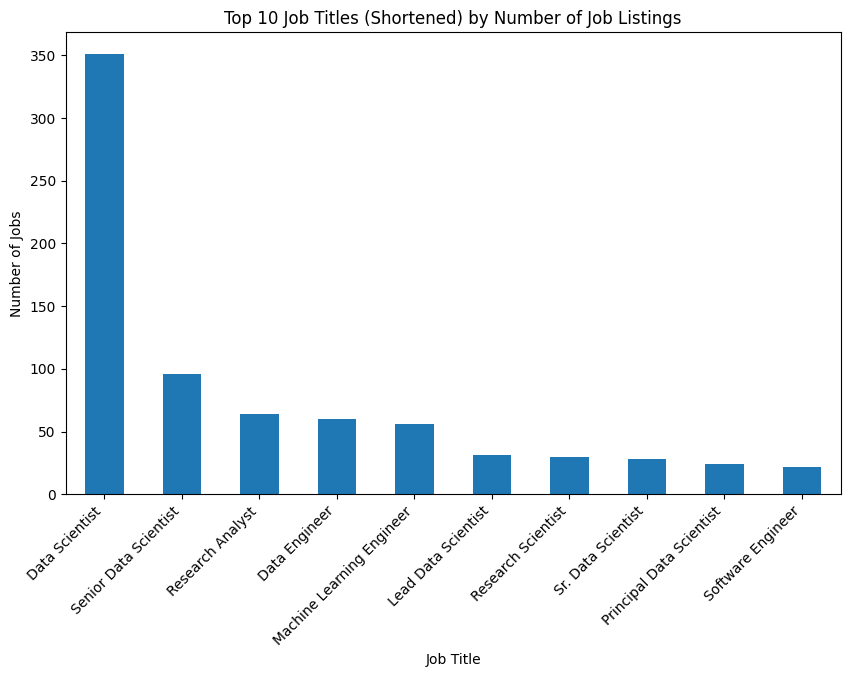

In [32]:
top_short_positions = df['Short_Position'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_short_positions.plot(kind='bar')
plt.title("Top 10 Job Titles (Shortened) by Number of Job Listings")
plt.xlabel("Job Title")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45, ha='right')
plt.show()